- Name: `Samip Regmi`
- Group: `L5CG4`
- University ID: `2511198`
- Idenfication Number: `np02cs4a240105`
- Submitted To: `Ayush Regmi Sir`

# Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

## Dataset

In [ ]:
df_class = pd.read_csv("/content/drive/MyDrive/FINAL_AI_WORK/water_potability.csv")

## Data Exploration

- [x]  Display the first 10 rows

In [ ]:
df_class.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


- [x]  Count the number of rows and columns

In [ ]:
rows, columns = df_class.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 3276
Number of columns: 10


- [x] List all column names and their data types.

In [ ]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


- [x] Check for missing values in each column and report total counts.

In [ ]:
df_class.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


- [x] numeric columns stored as text

In [ ]:
df_class.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


- [x] Checking duplicate rows

In [ ]:
df_class.duplicated().sum()

np.int64(0)

- [x] Null values removal


Missing data were handled based on the proportion of missingness. For columns with 10% or less missing values, rows containing missing observations were removed to maintain accuracy. For columns with more than 10% missing values, missing entries were imputed using the column mean to preserve the data distribution

In [ ]:
null_percentage = df_class.isnull().sum() / df_class.shape[0] * 100
null_columns_fill = null_percentage[null_percentage > 10].index
df_class.fillna(df_class[null_columns_fill].mean(), inplace=True)
null_columns_drop = null_percentage[null_percentage <= 10].index
df_class.dropna(subset=null_columns_drop, inplace=True)

- [x] Checking for null value

In [ ]:
df_class.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


- [x] Columns

In [ ]:
df_class.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

- [x] Checking class distribution

In [ ]:
print(df_class['Potability'].value_counts())
print(df_class['Potability'].value_counts(normalize=True) * 100)

Potability
0    1891
1    1223
Name: count, dtype: int64
Potability
0    60.725755
1    39.274245
Name: proportion, dtype: float64


- [x] Correlation of features with labels

In [ ]:
correlation_with_target = df_class.corr()['Potability'].sort_values(ascending=False)
print(correlation_with_target)

Potability         1.000000
Solids             0.031812
Chloramines        0.026719
Turbidity          0.007268
Trihalomethanes    0.007130
ph                -0.003566
Conductivity      -0.006069
Hardness          -0.010453
Sulfate           -0.016495
Organic_carbon    -0.036048
Name: Potability, dtype: float64


## Saving cleaned data

In [ ]:
df_class.to_csv("./potability_cleaned.csv")

## Visualization

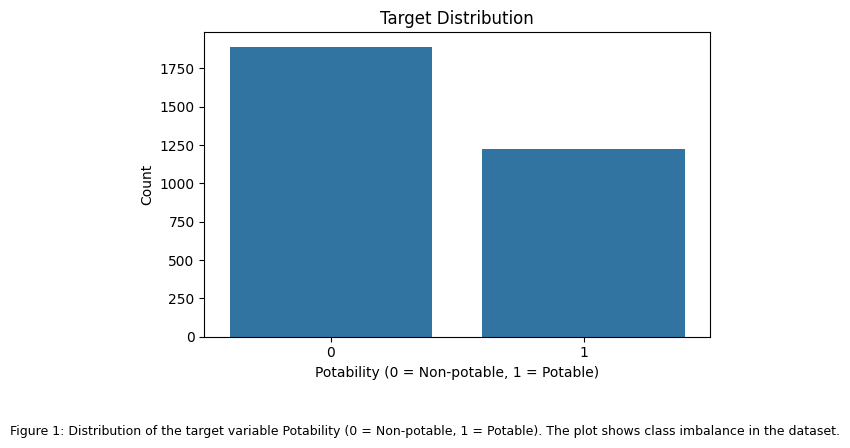

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df_class)

plt.title('Target Distribution')

plt.xlabel('Potability (0 = Non-potable, 1 = Potable)')
plt.ylabel('Count')

plt.figtext(
    0.5, -0.1,
    'Figure 1: Distribution of the target variable Potability (0 = Non-potable, 1 = Potable). '
    'The plot shows class imbalance in the dataset.',
    ha='center',
    fontsize=9
)

plt.tight_layout()
plt.show()


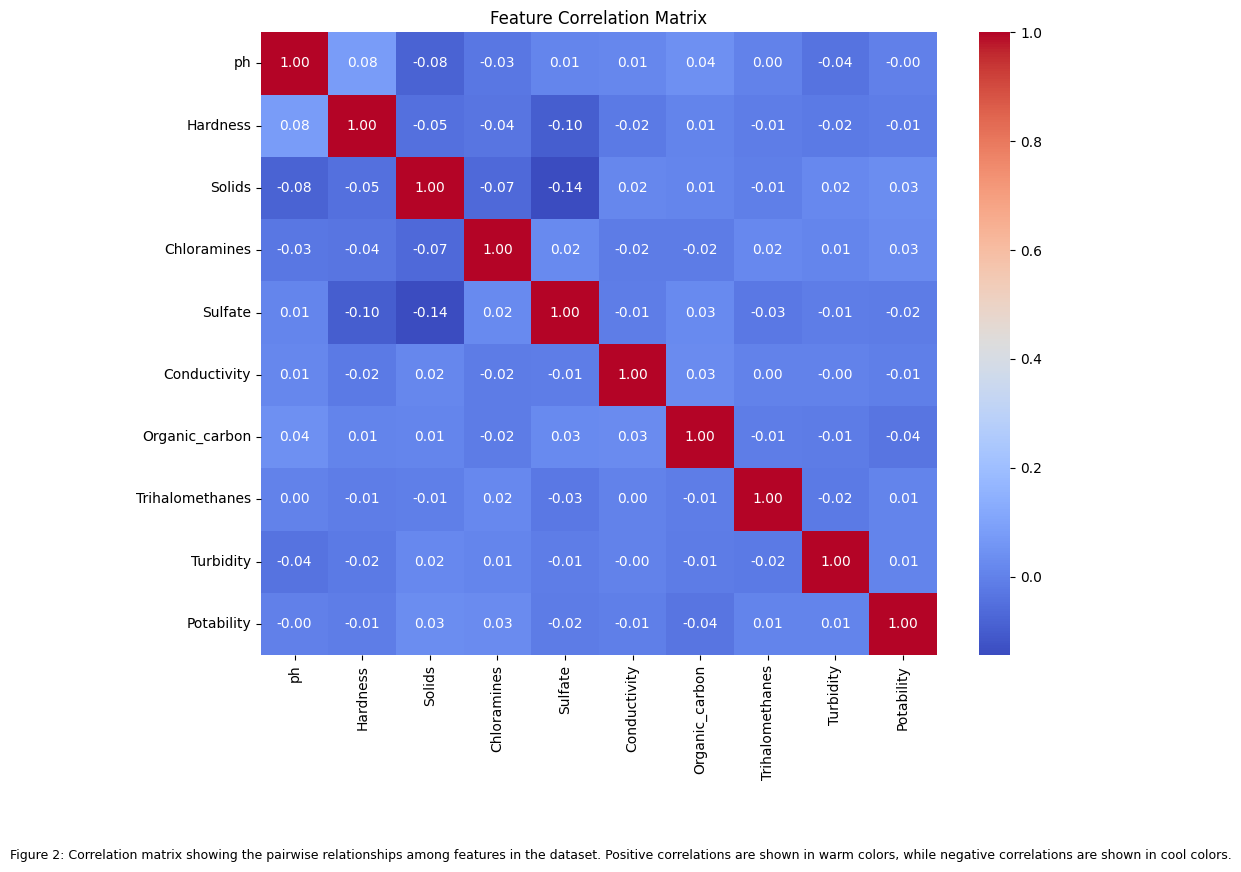

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_class.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')

plt.figtext(
    0.5, -0.08,
    'Figure 2: Correlation matrix showing the pairwise relationships among features in the dataset. '
    'Positive correlations are shown in warm colors, while negative correlations are shown in cool colors.',
    ha='center',
    fontsize=9
)

plt.tight_layout()
plt.show()


**Interpretation of Graph**

- Features are mostly independent
- No strong linear relationships
- Potability is NOT linearly dependent on any single feature

## Selecting features and labels

In [ ]:
X = df_class.drop('Potability', axis=1)
y = df_class['Potability']

## Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data processed. Training Shape:", X_train_scaled.shape)

Data processed. Training Shape: (2491, 9)


## Synthetic Minority Oversampling Technique

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

## Data and Class Distribution after SMOTE

In [ ]:
print(pd.Series(y_train_res).value_counts())
print(pd.Series(y_train_res).value_counts(normalize=True) * 100)

Potability
0    1486
1    1486
Name: count, dtype: int64
Potability
0    50.0
1    50.0
Name: proportion, dtype: float64


## Neural Network

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(32,16), activation='relu',solver='adam', max_iter=200, random_state=42)

nn_model.fit(X_train_res, y_train_res)
y_pred_nn = nn_model.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print(f"Neural Network - Accuracy: {accuracy_nn:.2f}, Precision: {precision_nn:.2f}, Recall: {recall_nn:.2f}, F1: {f1_nn:.2f}")

Neural Network - Accuracy: 0.65, Precision: 0.50, Recall: 0.47, F1: 0.48


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced')
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test_scaled)

## RandomForest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test_scaled)

## Metrics

In [ ]:
print("Logistic Regression Baseline:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Baseline:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Baseline:
               precision    recall  f1-score   support

           0       0.63      0.50      0.56       405
           1       0.33      0.46      0.39       218

    accuracy                           0.49       623
   macro avg       0.48      0.48      0.47       623
weighted avg       0.53      0.49      0.50       623

Random Forest Baseline:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       405
           1       0.47      0.43      0.45       218

    accuracy                           0.63       623
   macro avg       0.59      0.58      0.59       623
weighted avg       0.62      0.63      0.63       623



## Random Forest hyperparameter

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

rf_cv = RandomizedSearchCV(rf,param_distributions=param_grid_rf,n_iter=10, cv=5, scoring='f1', random_state=42)
rf_cv.fit(X_train_res, y_train_res)
print("Best RF Hyperparameters:", rf_cv.best_params_)
print("Best RF CV Score:", rf_cv.best_score_)

Best RF Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 15}
Best RF CV Score: 0.7096746733999646


## Logistic Regression hyperparameter

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
}

lr_cv = RandomizedSearchCV(lr,param_distributions=param_grid_lr,n_iter=5, cv=5, scoring='f1', n_jobs=-1, random_state=42)
lr_cv.fit(X_train_res, y_train_res)

print("Best LR Hyperparameters:", lr_cv.best_params_)
print("Best LR CV Score:", lr_cv.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best LR Hyperparameters: {'penalty': 'l2', 'C': 0.1}
Best LR CV Score: 0.4846217044986457


## Feature Selection

- [x] used Recursive Feature Elimination (RFE)

In [ ]:
lr_fs = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(lr_fs, n_features_to_select=5)
rfe.fit(X_train_res, y_train_res)

selected_features = X.columns[rfe.support_]
print("Selected Features:", list(selected_features))

Selected Features: ['Hardness', 'Solids', 'Sulfate', 'Organic_carbon', 'Turbidity']


## Final models

In [ ]:
rfe.support_ # BOOLEAN MASK

array([False,  True,  True, False,  True, False,  True, False,  True])

In [ ]:
# features from rfe only for training

X_train_fs = X_train_res[:, rfe.support_]

# Same here for testing
X_test_fs = X_test_scaled[:, rfe.support_]

lr_final = LogisticRegression(**lr_cv.best_params_, max_iter=1000, random_state=42)
lr_final.fit(X_train_fs, y_train_res)
y_pred_lr_final = lr_final.predict(X_test_fs)

rf_final = RandomForestClassifier(**rf_cv.best_params_, random_state=42)
rf_final.fit(X_train_fs, y_train_res)
y_pred_rf_final = rf_final.predict(X_test_fs)

## Comparative Analysis

In [ ]:
results = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr_final), accuracy_score(y_test, y_pred_rf_final)],
    'Precision': [precision_score(y_test, y_pred_lr_final), precision_score(y_test, y_pred_rf_final)],
    'Recall': [recall_score(y_test, y_pred_lr_final), recall_score(y_test, y_pred_rf_final)],
    'F1-Score': [f1_score(y_test, y_pred_lr_final), f1_score(y_test, y_pred_rf_final)]
}

df_results = pd.DataFrame(results)
print("After using Hyperparameters and optimization")
display(df_results)


After using Hyperparameters and optimization


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.484751,0.328904,0.454128,0.381503
1,Random Forest,0.550562,0.357798,0.357798,0.357798


## Visualization

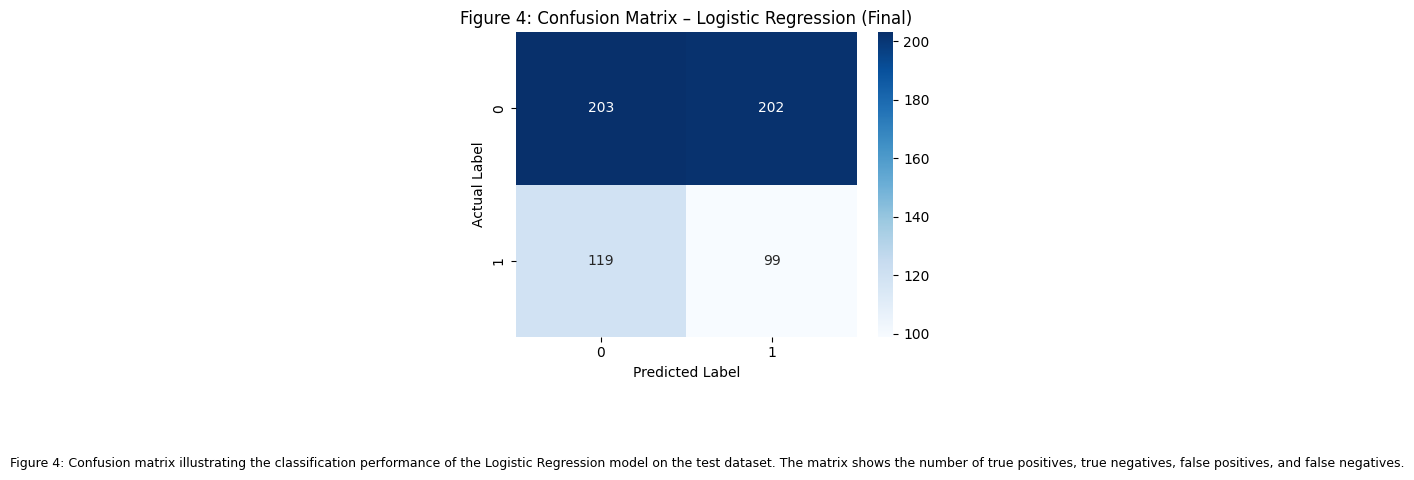

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr_final)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Figure 4: Confusion Matrix – Logistic Regression (Final)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.figtext(
    0.5, -0.18,
    'Figure 4: Confusion matrix illustrating the classification performance of the '
    'Logistic Regression model on the test dataset. The matrix shows the number of '
    'true positives, true negatives, false positives, and false negatives.',
    ha='center',
    fontsize=9
)

plt.tight_layout()
plt.show()


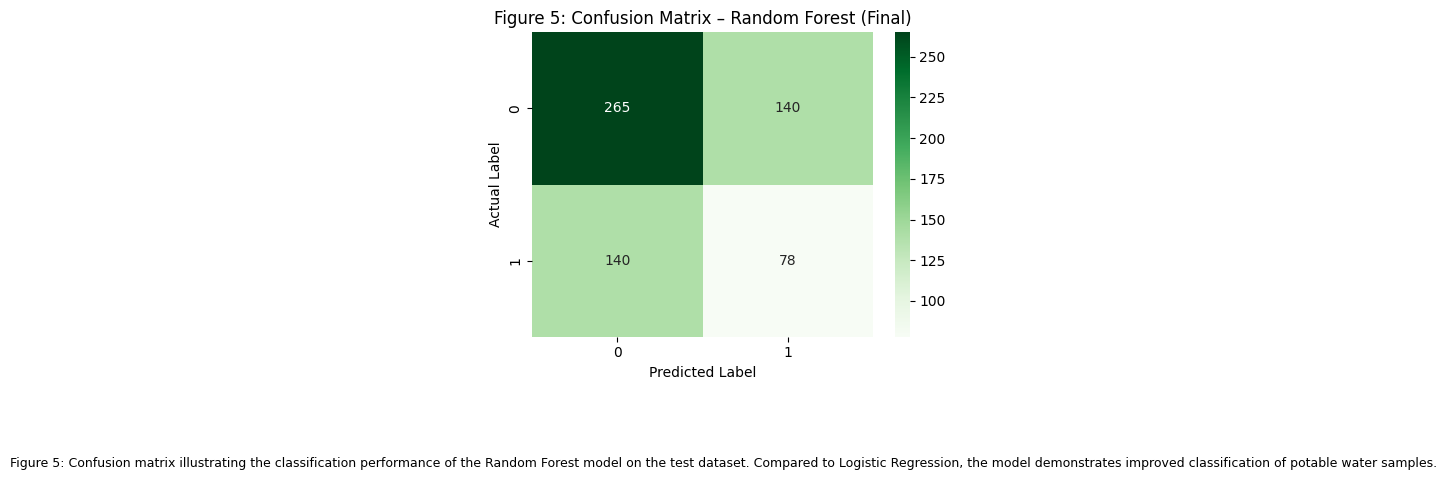

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf_final)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Figure 5: Confusion Matrix – Random Forest (Final)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.figtext(
    0.5, -0.18,
    'Figure 5: Confusion matrix illustrating the classification performance of the '
    'Random Forest model on the test dataset. Compared to Logistic Regression, '
    'the model demonstrates improved classification of potable water samples.',
    ha='center',
    fontsize=9
)

plt.tight_layout()
plt.show()
